# 1. Setup and Get Data

### 1.1 Install Dependencies and Setup

In [ ]:
#Install the required packages
# This script is for installing the required packages for the project.
!pip install labelme 
!pip install tensorflow 
!pip install opencv-python
!pip install matplotlib 
!pip install albumentations
!pip install numpy

You should consider upgrading via the 'D:\Samapti\Projects\face_recog\.venv\Scripts\python.exe -m pip install --upgrade pip' command.


You should consider upgrading via the 'D:\Samapti\Projects\face_recog\.venv\Scripts\python.exe -m pip install --upgrade pip' command.


You should consider upgrading via the 'D:\Samapti\Projects\face_recog\.venv\Scripts\python.exe -m pip install --upgrade pip' command.


You should consider upgrading via the 'D:\Samapti\Projects\face_recog\.venv\Scripts\python.exe -m pip install --upgrade pip' command.


You should consider upgrading via the 'D:\Samapti\Projects\face_recog\.venv\Scripts\python.exe -m pip install --upgrade pip' command.


You should consider upgrading via the 'D:\Samapti\Projects\face_recog\.venv\Scripts\python.exe -m pip install --upgrade pip' command.


### 1.2 Collect Images Using OpenCV

In [ ]:
# import required libraries
import os
import time
import uuid
import cv2

In [ ]:
#create a unique identifier for the session
uuid.uuid1()

UUID('cf595d06-2ce6-11f0-9d6f-7c4d8f0dfb0e')

In [ ]:
#Defining the path for the images
# The path where the images will be stored
IMAG_PATH = os.path.join('data','img')
# image_path = '/images'
number_images = 60

In [ ]:
#create images directory
# Create the directory if it doesn't exist
os.makedirs(IMAG_PATH, exist_ok=True)

cap = cv2.VideoCapture(0)  # Use 0 for default camera instead of 1

for imgnum in range(number_images):
    print(f'Collecting image {imgnum}')
    ret, frame = cap.read()
    
    # Check if frame was captured successfully
    if not ret:
        print("Failed to capture frame")
        break
        
    # Generate unique filename
    imgname = os.path.join(IMAG_PATH, f'{str(uuid.uuid1())}.jpg')
    
    # Save the image
    cv2.imwrite(imgname, frame)
    cv2.imshow('frame', frame)
    time.sleep(0.5)

    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

# Release resources outside the loop
cap.release()
cv2.destroyAllWindows()

### 1.3 Annotate Images with LabelMe

In [ ]:
#create lebel me json file
# This will create a labelme json file for the images
!labelme

2025-05-09 10:38:08.509 | INFO     | labelme.config:get_config:66 - Loading config file from: C:\Users\Samapti\.labelmerc


# 2. Review Dataset and Build Image Loading Function

### 2.1 Import TF and Deps

In [ ]:
#check the version of tensorflow
import tensorflow as tf
print(tf.__version__) 

2.19.0


In [ ]:
#import libraries
import tensorflow as tf
import json
import numpy as np
from matplotlib import pyplot as plt
import os
import cv2

### 2.3 Load Image into TF Data Pipeline

In [ ]:
#load the created images by using webcam from the directory    
images = tf.data.Dataset.list_files('data\\images\\*.jpg')

In [ ]:
#retrive the next image from the dataset
images.as_numpy_iterator().next()

b'data\\images\\57880e50-2c8e-11f0-9f7b-7c4d8f0dfb0e.jpg'

In [ ]:

# load the images
# This function loads the images from the directory and resizes them to 120x120
images = tf.data.Dataset.list_files('data/train/images/*.jpg', shuffle=False)

def load_image(x):
    byte_img = tf.io.read_file(x)
    img = tf.image.decode_jpeg(byte_img, channels=3)
    img = tf.image.resize(img, (120, 120))
    return img

images = images.map(load_image)




In [173]:
images.as_numpy_iterator().next()

array([[[251.      , 255.      , 255.      ],
        [251.      , 255.      , 255.      ],
        [251.      , 255.      , 255.      ],
        ...,
        [250.029   , 255.      , 255.      ],
        [248.76413 , 255.      , 254.93912 ],
        [246.78835 , 255.      , 255.      ]],

       [[251.      , 255.      , 255.      ],
        [251.      , 255.      , 255.      ],
        [251.      , 255.      , 255.      ],
        ...,
        [249.47916 , 255.      , 255.      ],
        [249.9125  , 255.      , 255.      ],
        [249.      , 255.      , 255.      ]],

       [[250.      , 254.30417 , 255.      ],
        [248.0875  , 254.0875  , 254.0875  ],
        [249.      , 255.      , 255.      ],
        ...,
        [246.95833 , 255.      , 254.72873 ],
        [250.      , 255.      , 255.      ],
        [249.      , 255.      , 255.      ]],

       ...,

       [[164.0039  , 144.0624  , 119.84571 ],
        [144.92809 , 127.053345, 102.14474 ],
        [134.0217  , 1

In [ ]:
#check the images type
type(images)

tensorflow.python.data.ops.map_op._MapDataset

### 2.4 View Raw Images with Matplotlib

In [ ]:
#create numpy iterator with batch size 4
image_generator = images.batch(4).as_numpy_iterator()

In [ ]:
#retreve next batch of the images in the plot  images 
plot_images = image_generator.next()

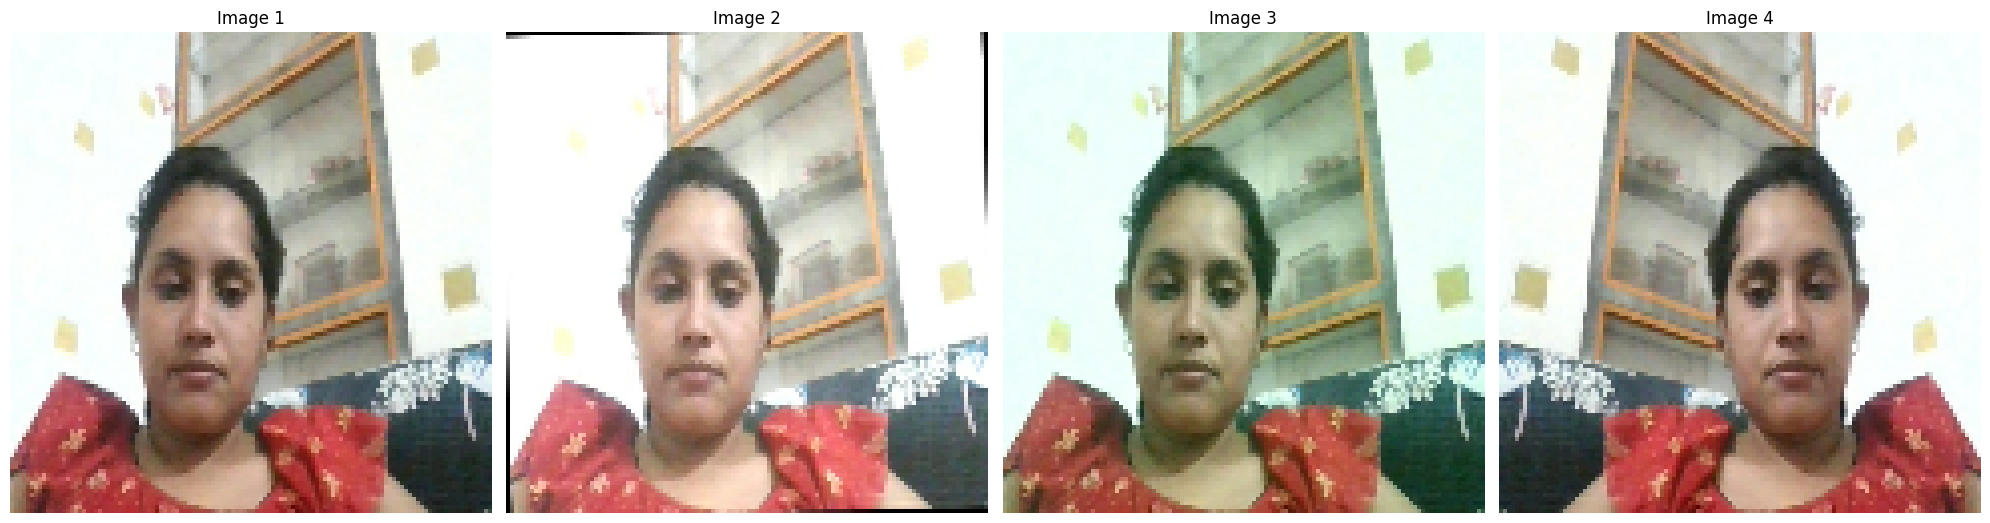

In [ ]:
#create 4 images plot in sigle figure
fig, ax = plt.subplots(ncols=4, figsize=(20, 20))
for idx, image in enumerate(plot_images):
    # Option 1: if your image is float with 0-255 range
    norm_img = tf.clip_by_value(image / 255.0, 0.0, 1.0)  # or use tf.cast(image, tf.uint8)
    ax[idx].imshow(norm_img)
    ax[idx].set_title(f"Image {idx+1}")
    ax[idx].axis("off")

plt.tight_layout()
plt.show()


#3. Partition Unaugmented Data

###3.1 MANUALLY SPLT DATA INTO TRAIN TEST AND VAL

In [ ]:
#180*.7 #84 to train
#180*.15 # 14 and 13 to test and val


### 3.2 Move the Matching Labels

In [ ]:
#loop the images and split them into train, test and val
for folder in ['train','test','val']:
    for file in os.listdir(os.path.join('data', folder, 'images')):
        
        filename = file.split('.')[0]+'.json'
        existing_filepath = os.path.join('data','labels', filename)
        if os.path.exists(existing_filepath): 
            new_filepath = os.path.join('data',folder,'labels',filename)
            os.replace(existing_filepath, new_filepath)      

# 4. Apply Image Augmentation on Images and Labels using Albumentations

### 4.1 Setup Albumentations Transform Pipeline

In [181]:
import albumentations as alb

In [ ]:
#images augmentation with image size 450*450,filip, brightness, contrast, gamma, RGB shift, rotation and scale

augmentor = alb.Compose([alb.Resize(450, 450), #alb.RandomCrop(width=450, height=450), 
                         alb.HorizontalFlip(p=0.5), 
                         alb.RandomBrightnessContrast(brightness_limit=0.1, contrast_limit=0.1, p=0.3),
                         alb.RandomGamma(p=0.2), 
                         alb.RGBShift(p=0.2), 
                         # alb.VerticalFlip(p=0.5), 
                         alb.Rotate(limit=5,p=0.3),
                         alb.RandomScale(scale_limit=0.1,p=0.3)],
                       bbox_params=alb.BboxParams(format='albumentations', 
                                                  label_fields=['class_labels']))
                       # bbox_params=alb.BboxParams(format='pascal_voc', 
                       #                          label_fields=['class_labels']))

### 4.2 Load a Test Image and Annotation with OpenCV and JSON

In [ ]:
#read images from the directory
img = cv2.imread(os.path.join('data','train', 'images','de3b95e6-111f-11f0-ad76-bcf4d44edc40.jpg'))

In [ ]:
#opend lebeled json file
with open(os.path.join('data', 'train', 'labels', 'de3b95e6-111f-11f0-ad76-bcf4d44edc40.json'), 'r') as f:
    label = json.load(f)

In [ ]:
#check the lebeled json file shape

label['shapes'][0]['points']

[[301.4159292035398, 46.63716814159295],
 [577.5221238938052, 349.2920353982301]]

### 4.3 Extract Coordinates and Rescale to Match Image Resolution

In [ ]:
#coordinates the boundary box create
coords = [0,0,0,0]
coords[0] = label['shapes'][0]['points'][0][0]
coords[1] = label['shapes'][0]['points'][0][1]
coords[2] = label['shapes'][0]['points'][1][0]
coords[3] = label['shapes'][0]['points'][1][1]

In [ ]:

coords

[301.4159292035398, 46.63716814159295, 577.5221238938052, 349.2920353982301]

In [188]:
coords = [float(coords[0]), float(coords[1]), float(coords[2]), float(coords[3])]


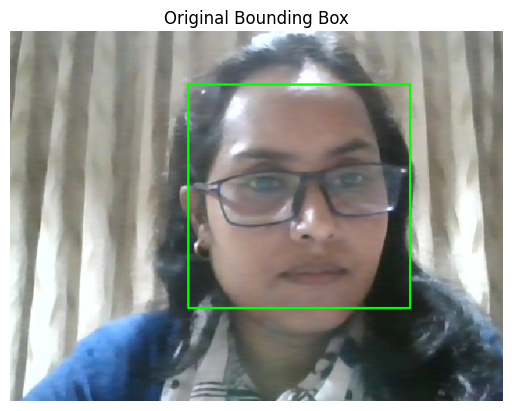

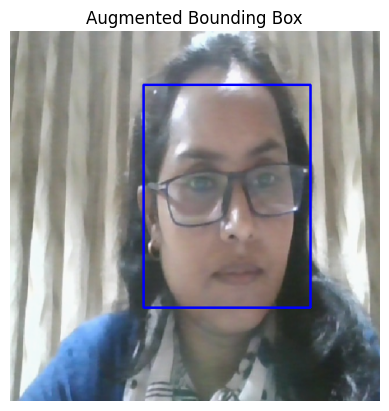

In [190]:
# Load image
img_path = os.path.join('data', 'train', 'images', 'eb51efac-111f-11f0-b1bf-bcf4d44edc40.jpg')
img = cv2.imread(img_path)
if img is None:
    raise ValueError(f"Failed to load image at path: {img_path}")

# Load label
with open(os.path.join('data', 'train', 'labels', 'eb51efac-111f-11f0-b1bf-bcf4d44edc40.json'), 'r') as f:
    label = json.load(f)

# Extract coordinates
x1, y1 = label['shapes'][0]['points'][0]
x2, y2 = label['shapes'][0]['points'][1]
x_min, x_max = sorted([x1, x2])
y_min, y_max = sorted([y1, y2])

h, w, _ = img.shape
coords = [x_min / w, y_min / h, x_max / w, y_max / h]  # normalized

# Show original
image_copy = img.copy()
cv2.rectangle(image_copy, (int(x_min), int(y_min)), (int(x_max), int(y_max)), (0, 255, 0), 2)
plt.imshow(cv2.cvtColor(image_copy, cv2.COLOR_BGR2RGB))
plt.title("Original Bounding Box")
plt.axis('off')
plt.show()

# Augmentation
try:
    augmented = augmentor(image=img, bboxes=[coords], class_labels=['face'])

    aug_img = augmented['image']
    aug_img = np.clip(aug_img, 0, 255).astype(np.uint8)

    aug_bbox = augmented['bboxes'][0]
    x1 = int(aug_bbox[0] * aug_img.shape[1])
    y1 = int(aug_bbox[1] * aug_img.shape[0])
    x2 = int(aug_bbox[2] * aug_img.shape[1])
    y2 = int(aug_bbox[3] * aug_img.shape[0])

    cv2.rectangle(aug_img, (x1, y1), (x2, y2), (255, 0, 0), 2)
    plt.imshow(cv2.cvtColor(aug_img, cv2.COLOR_BGR2RGB))
    plt.title("Augmented Bounding Box")
    plt.axis('off')
    plt.show()

except Exception as e:
    print(f"Augmentation failed: {e}")

### 4.4 Apply Augmentations and View Results

In [191]:
augmented = augmentor(image=img, bboxes=[coords], class_labels=['face'])
print(np.min(augmented['image']), np.max(augmented['image']))


12 255


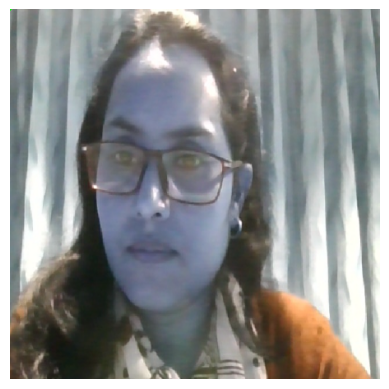

In [ ]:
#aumented pipeline to the images 
img = augmented['image'].copy()
bbox = augmented['bboxes'][0]  # [x_min, y_min, width, height]
x_min, y_min, w, h = map(int, bbox)
x_max, y_max = x_min + w, y_min + h

cv2.rectangle(img, (x_min, y_min), (x_max, y_max), (0, 255, 0), 2)
plt.imshow(img)
plt.axis('off')
plt.show()


In [ ]:

augmented['bboxes'][0][2:]

[0.6382743418216705, 0.7479719519615173]

In [194]:
augmented['bboxes']

[[0.1875, 0.14509586989879608, 0.6382743418216705, 0.7479719519615173]]

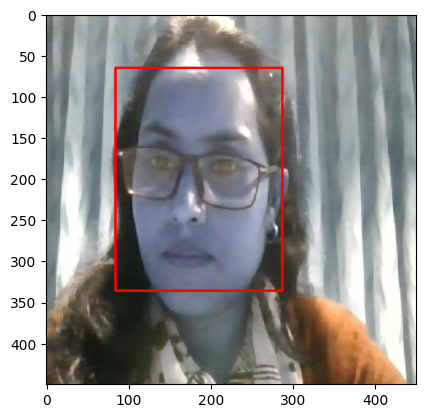

In [ ]:
#check bounding box coordinates using cv2

cv2.rectangle(augmented['image'], 
              tuple(np.multiply(augmented['bboxes'][0][:2], [450,450]).astype(int)),
              tuple(np.multiply(augmented['bboxes'][0][2:], [450,450]).astype(int)), 
                    (255,0,0), 2)

plt.imshow(augmented['image'])

# 5. Build and Run Augmentation Pipeline

### 5.1 Run Augmentation Pipeline

In [196]:
from tqdm import tqdm


# Utility: Normalize bbox if needed
def normalize_bbox(coords, w, h):
    if max(coords) > 1.0:  # assume pixel input, normalize
        coords = np.divide(coords, [w, h, w, h])
    return np.clip(coords, 0.0, 1.0)

# Main augmentation loop
for partition in ['train', 'test', 'val']:
    image_dir = os.path.join('data', partition, 'images')
    label_dir = os.path.join('data', partition, 'labels')
    images = os.listdir(image_dir)

    for image in tqdm(images, desc=f"Augmenting {partition}"):
        base_name = image.split(".")[0]
        img_path = os.path.join(image_dir, image)

        # Skip if already augmented
        aug_check_path = os.path.join(image_dir, f"{base_name}.0.jpg")
        if os.path.exists(aug_check_path):
            continue

        img = cv2.imread(img_path)
        if img is None:
            print(f"Failed to load image: {img_path}")
            continue

        h, w = img.shape[:2]
        coords = [0, 0, 0.00001, 0.00001]  # default fallback if label not found

        label_path = os.path.join(label_dir, f"{base_name}.json")
        if os.path.exists(label_path):
            try:
                with open(label_path, 'r') as f:
                    label = json.load(f)

                raw_points = label['shapes'][0]['points']
                flat = [pt for pair in raw_points for pt in pair]

                if len(flat) == 4:
                    coords = flat
                elif len(flat) == 3:
                    coords = [flat[0], flat[1], flat[2], flat[1] + 10]
                else:
                    print(f"Invalid bbox format in: {label_path}")
                    continue

                coords = normalize_bbox(coords, w, h)

            except Exception as e:
                print(f" Error parsing label {label_path}: {e}")
                continue

        try:
            augment_count = 60 if partition == 'train' else 5
            for x in range(augment_count):
                augmented = augmentor(image=img, bboxes=[coords], class_labels=['face'])

                aug_img_name = f"{base_name}.{x}.jpg"
                cv2.imwrite(os.path.join(image_dir, aug_img_name), augmented['image'])

                annotation = {
                    'image': aug_img_name,
                    'bbox': augmented['bboxes'][0] if augmented['bboxes'] else [0, 0, 0, 0],
                    'class': 1 if augmented['bboxes'] else 0
                }

                with open(os.path.join(label_dir, f"{base_name}.{x}.json"), 'w') as f:
                    json.dump(annotation, f)

        except Exception as e:
            print(f" Error augmenting {image}: {e}")


Augmenting val: 100%|████████████████████████████████████████████████████████████████████████████████████████████| 162/162 [00:00<00:00, 12000.87it/s]


### 5.2 Load Augmented Images to Tensorflow Dataset

In [217]:
# train_images = tf.data.Dataset.list_files('aug_data\\train\\images\\*.jpg', shuffle=False)
train_images = tf.data.Dataset.list_files('data/train/images/*.jpg', shuffle=False)

train_images = train_images.map(load_image)
train_images = train_images.map(lambda x: tf.image.resize(x, (120,120)))
# train_images = train_images.map(lambda x: x/255)

In [218]:
test_images = tf.data.Dataset.list_files('data\\test\\images\\*.jpg', shuffle=False)
test_images = test_images.map(load_image)
test_images = test_images.map(lambda x: tf.image.resize(x, (120,120)))
# test_images = test_images.map(lambda x: x/255)

In [219]:
val_images = tf.data.Dataset.list_files('data\\val\\images\\*.jpg', shuffle=False)
val_images = val_images.map(load_image)
val_images = val_images.map(lambda x: tf.image.resize(x, (120,120)))
# val_images = val_images.map(lambda x: x/255)

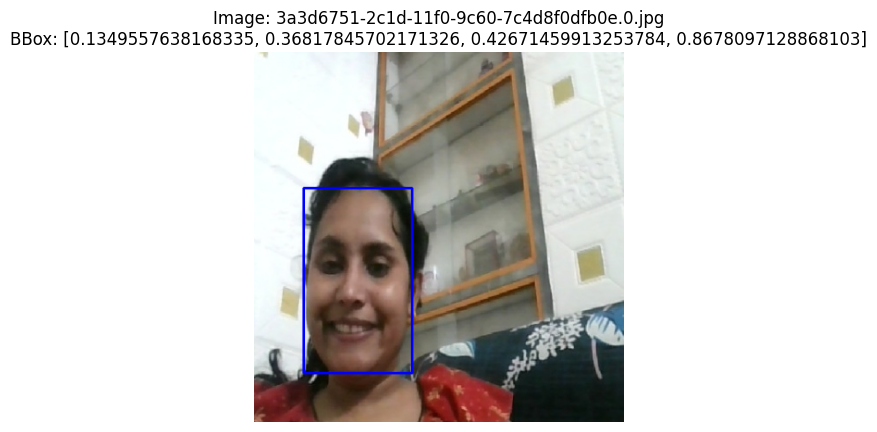

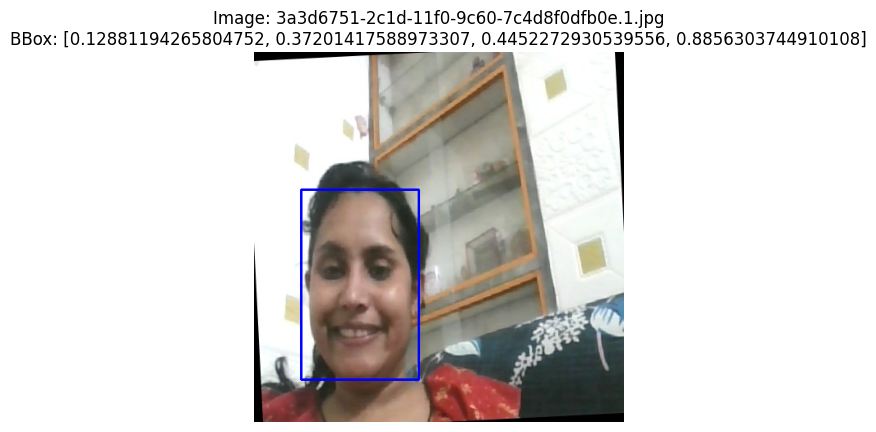

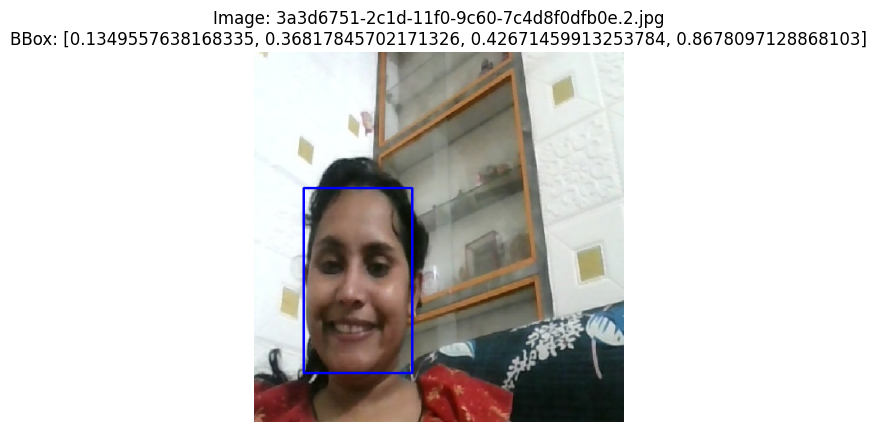

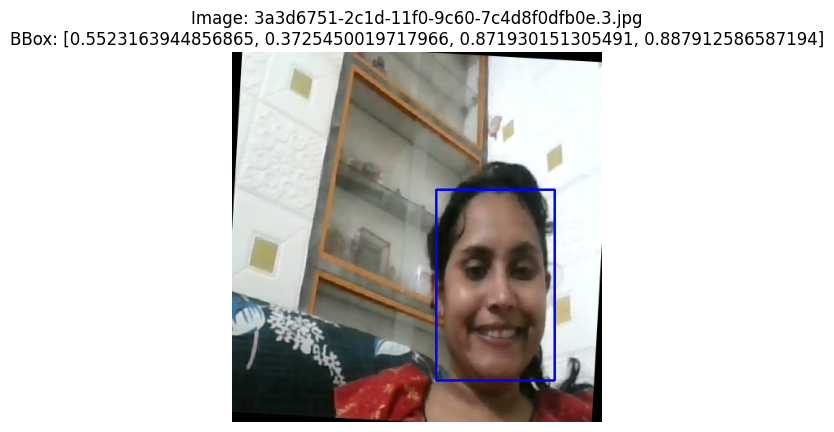

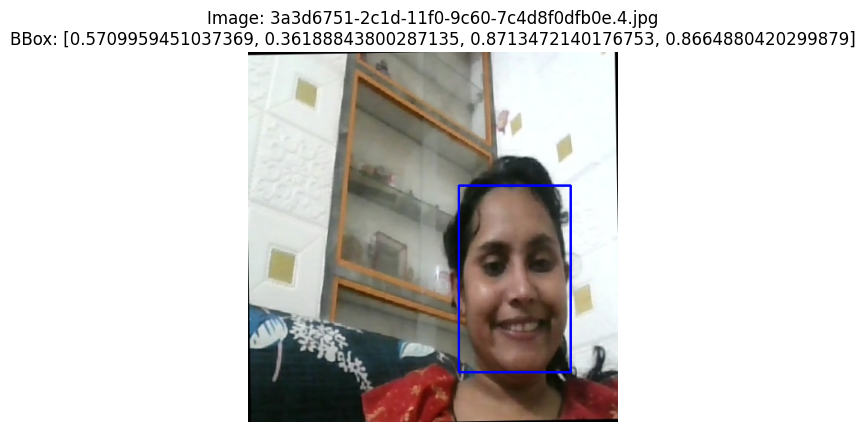

In [220]:

# Directories for validation images and labels
img_dir = 'data/val/images'
label_dir = 'data/val/labels'

# List image filenames in your validation set
img_files = os.listdir(img_dir)

# Process a few images (e.g., first 5)
for i in range(5):
    img_file = img_files[i]
    base_name = os.path.splitext(img_file)[0]
    label_path = os.path.join(label_dir, base_name + '.json')
    
    # Check if label file exists
    if not os.path.exists(label_path):
        print(f"Label file not found for image: {img_file}")
        continue

    # Load image using OpenCV
    img_path = os.path.join(img_dir, img_file)
    img = cv2.imread(img_path)
    if img is None:
        print(f"Failed to load image: {img_file}")
        continue

    # Load corresponding label file (JSON)
    with open(label_path, 'r') as f:
        label = json.load(f)
    
    # Extract bounding box from the label.
    # Change the key if your JSON structure is different.
    bbox = label.get('bbox')
    if bbox is None:
        print(f"No bbox found in {label_path}")
        continue

    # Assume bbox is normalized [x_min, y_min, x_max, y_max]
    # Convert to pixel coordinates
    h, w, _ = img.shape
    pt1 = (int(bbox[0] * w), int(bbox[1] * h))
    pt2 = (int(bbox[2] * w), int(bbox[3] * h))

    # Draw the bounding box on the image
    cv2.rectangle(img, pt1, pt2, (255, 0, 0), 2)

    # Display the image using matplotlib
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.title(f"Image: {img_file}\nBBox: {bbox}")
    plt.axis('off')
    plt.show()


Image shape: (120, 120, 3), dtype: <dtype: 'float32'>
BBox input: [[60. 60. 50. 50.]]
Pixel Range: 1.8991464 → 255.0
Drawing box: (x1=0, y1=0) → (x2=119, y2=119)


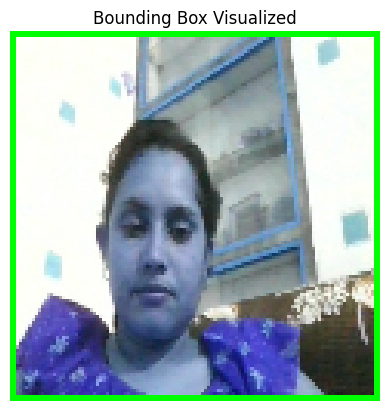

In [221]:


def plot_sample(image, bboxes):
    # Check image input
    print(f"Image shape: {image.shape}, dtype: {image.dtype}")
    image = image.numpy() if isinstance(image, tf.Tensor) else image

    # Check bounding box input
    if isinstance(bboxes, tf.Tensor):
        bboxes = bboxes.numpy()
    print(f"BBox input: {bboxes}")

    if bboxes.ndim == 1:
        bboxes = np.expand_dims(bboxes, axis=0)
    if bboxes.shape[-1] != 4:
        raise ValueError(f"Invalid bbox format: {bboxes.shape}. Expected shape (*, 4)")

    # Check pixel value range
    print("Pixel Range:", image.min(), "→", image.max())

    # Convert to uint8 if float
    if image.dtype != np.uint8:
        image = np.clip(image, 0, 255).astype(np.uint8)

    # Draw bounding boxes
    for bbox in bboxes:
        x_center, y_center, box_w, box_h = bbox
        scale_factor = 2.5
        box_w *= scale_factor
        box_h *= scale_factor
        x1 = int(x_center - box_w / 2)
        y1 = int(y_center - box_h / 2)
        x2 = int(x_center + box_w / 2)
        y2 = int(y_center + box_h / 2)

        x1 = max(0, min(image.shape[1] - 1, x1))
        y1 = max(0, min(image.shape[0] - 1, y1))
        x2 = max(0, min(image.shape[1] - 1, x2))
        y2 = max(0, min(image.shape[0] - 1, y2))

        print(f"Drawing box: (x1={x1}, y1={y1}) → (x2={x2}, y2={y2})")
        cv2.rectangle(image, (x1, y1), (x2, y2), (0, 255, 0), 2)

    # Show image
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.title("Bounding Box Visualized")
    plt.axis("off")
    plt.show()

# ========= Load a sample image from your dataset =========
image = next(iter(train_images))  # Should be shape (120, 120, 3)

# Define a dummy bbox in format [x_center, y_center, width, height]
bbox = tf.constant([[60, 60, 50, 50]], dtype=tf.float32)

# Visualize
plot_sample(image, bbox)


In [222]:
train_images.as_numpy_iterator().next()

array([[[251.      , 255.      , 255.      ],
        [251.      , 255.      , 255.      ],
        [251.      , 255.      , 255.      ],
        ...,
        [250.029   , 255.      , 255.      ],
        [248.76413 , 255.      , 254.93912 ],
        [246.78835 , 255.      , 255.      ]],

       [[251.      , 255.      , 255.      ],
        [251.      , 255.      , 255.      ],
        [251.      , 255.      , 255.      ],
        ...,
        [249.47916 , 255.      , 255.      ],
        [249.9125  , 255.      , 255.      ],
        [249.      , 255.      , 255.      ]],

       [[250.      , 254.30417 , 255.      ],
        [248.0875  , 254.0875  , 254.0875  ],
        [249.      , 255.      , 255.      ],
        ...,
        [246.95833 , 255.      , 254.72873 ],
        [250.      , 255.      , 255.      ],
        [249.      , 255.      , 255.      ]],

       ...,

       [[164.0039  , 144.0624  , 119.84571 ],
        [144.92809 , 127.053345, 102.14474 ],
        [134.0217  , 1

# 6. Prepare Labels

### 6.1 Build Label Loading Function

In [ ]:
# load the lebeles from the json file


def load_labels(label_path):
    with open(label_path.numpy(), 'r', encoding="utf-8") as f:
        label = json.load(f)

    label_class = label.get('class', 0)
    bbox = label.get('bbox', [0.0, 0.0, 0.0, 0.0])

    return [label_class], bbox


### 6.2 Load Labels to Tensorflow Dataset

In [ ]:
#load from train labels

train_labels = tf.data.Dataset.list_files('data\\train\\labels\\*.json', shuffle=False)
train_labels = train_labels.map(lambda x: tf.py_function(load_labels, [x], [tf.uint8, tf.float16]))

In [ ]:
#load from test labels

test_labels = tf.data.Dataset.list_files('data\\test\\labels\\*.json', shuffle=False)
test_labels = test_labels.map(lambda x: tf.py_function(load_labels, [x], [tf.uint8, tf.float16]))

In [ ]:
#load from val labels

val_labels = tf.data.Dataset.list_files('data\\val\\labels\\*.json', shuffle=False)
val_labels = val_labels.map(lambda x: tf.py_function(load_labels, [x], [tf.uint8, tf.float16]))

In [227]:
train_labels.as_numpy_iterator().next()

(array([0], dtype=uint8), array([0., 0., 0., 0.], dtype=float16))

# 7. Combine Label and Image Samples

### 7.1 Check Partition Lengths

In [228]:
len(train_images), len(train_labels), len(test_images), len(test_labels), len(val_images), len(val_labels)

(7686, 7712, 162, 173, 162, 189)

### 7.2 Create Final Datasets (Images/Labels)

In [ ]:
#create the final dataset from the images and labels  in the train

train = tf.data.Dataset.zip((train_images, train_labels))

train = train.shuffle(5000)            
train = train.cache()                  
train = train.batch(32)                
train = train.prefetch(tf.data.AUTOTUNE)  
train = train.repeat()                 

In [ ]:
#create the final dataset from the images and labels  in the  test 

test = tf.data.Dataset.zip((test_images, test_labels))
test = test.shuffle(1300)
test = test.batch(8)
test = test.prefetch(4)

In [ ]:
#create the final dataset from the images and labels  in the val

val = tf.data.Dataset.zip((val_images, val_labels))
val = val.shuffle(1000)
val = val.batch(32).prefetch(tf.data.AUTOTUNE)
val = val.prefetch(4)

In [232]:
train.as_numpy_iterator().next()[1]

(array([[1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1]], dtype=uint8),
 array([[0.2964  , 0.433   , 0.6855  , 0.938   ],
        [0.1364  , 0.08795 , 0.529   , 0.737   ],
        [0.009125, 0.1322  , 0.4792  , 0.77    ],
        [0.1087  , 0.418   , 0.504   , 0.9785  ],
        [0.62    , 0.3313  , 0.912   , 0.8696  ],
        [0.08795 , 0.099   , 0.536   , 0.726   ],
        [0.2622  , 0.3203  , 0.528   , 0.807   ],
        [0.3477  , 0.462   , 0.7007  , 0.9023  ],
        [0.442   , 0.1064  , 0.894   , 0.7334  ],
        [0.07355 , 0.1237  , 0.5464  , 0.766   ],
        [0.4973  , 0.1322  , 0.9507  , 0.7646  ],
        [0.11975 , 

### 7.3 View Images and Annotations

In [253]:
# data_samples = train.as_numpy_iterator()
data_sample = train.as_numpy_iterator()

In [254]:
# res = data_samples.next()
res = next(data_sample)

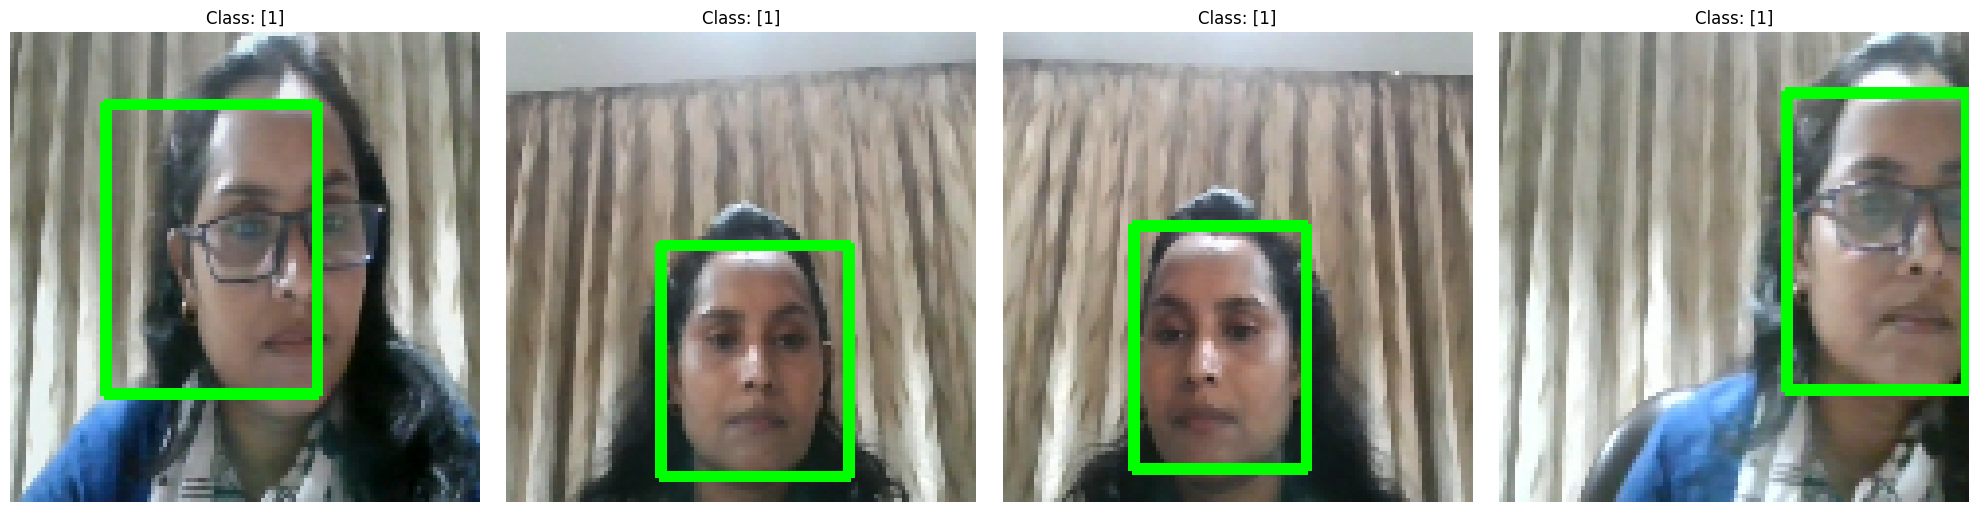

In [260]:
fig, ax = plt.subplots(ncols=4, figsize=(20, 5))


for idx in range(4):  # Fixed loop syntax
    # Get image and labels
    sample_image = res[0][idx].copy()  # Fixed indexing
    sample_class = res[1][0][idx]      # Class label
    sample_coords = res[1][1][idx]     # Bounding box coordinates
    
    # Clip coordinates between 0-1
    sample_coords = np.clip(sample_coords, 0, 1)
    
    # Convert normalized coordinates to pixel values
    h, w = sample_image.shape[:2]
    x_min = int(sample_coords[0] * w)
    y_min = int(sample_coords[1] * h)
    x_max = int(sample_coords[2] * w)
    y_max = int(sample_coords[3] * h)
    
    # Draw bounding box and label
    cv2.rectangle(sample_image, 
                 (x_min, y_min), 
                 (x_max, y_max), 
                 (0, 255, 0), 2)  # Fixed color format
    
    # Normalize image if needed
    if sample_image.max() > 1.0:
        sample_image = sample_image / 255.0
    
    # Plot image
    ax[idx].imshow(sample_image)
    ax[idx].set_title(f"Class: {sample_class}")
    ax[idx].axis('off')

plt.tight_layout()
plt.show()


# print("type(res):", type(res))
# print("len(res):", len(res))
# print("type(res[0]):", type(res[0]))
# print("res[0].shape:", res[0].shape)
# print("type(res[1]):", type(res[1]))
# print("res[1]:", res[1])
# print("res[1][0]:", res[1][0])
# print("res[1][0].shape (if possible):", np.array(res[1][0]).shape)



# 8. Build Deep Learning using the Functional API

### 8.1 Import Layers and Base Network

In [261]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv2D, Dense, GlobalMaxPooling2D
from tensorflow.keras.applications import VGG16

### 8.2 Download VGG16

In [262]:
vgg = VGG16(include_top=False)

In [263]:
vgg.summary()

Model: "vgg16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)           │ (None, None, None, 3)       │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv1 (Conv2D)                │ (None, None, None, 64)      │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv2 (Conv2D)                │ (None, None, None, 64)      │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_pool (MaxPooling2D)           │ (None, None, None, 64)      │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv1 (Conv2D)                │ (None, None, None, 128)     │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv2 (Conv2D)                │ (None, None, None, 128)     │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_pool (MaxPooling2D)           │ (None, None, None, 128)     │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv1 (Conv2D)                │ (None, None, None, 256)     │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv2 (Conv2D)                │ (None, None, None, 256)     │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv3 (Conv2D)                │ (None, None, None, 256)     │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_pool (MaxPooling2D)           │ (None, None, None, 256)     │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv1 (Conv2D)                │ (None, None, None, 512)     │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv2 (Conv2D)                │ (None, None, None, 512)     │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv3 (Conv2D)                │ (None, None, None, 512)     │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_pool (MaxPooling2D)           │ (None, None, None, 512)     │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv1 (Conv2D)                │ (None, None, None, 512)     │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv2 (Conv2D)                │ (None, None, None, 512)     │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv3 (Conv2D)                │ (None, None, None, 512)     │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_pool (MaxPooling2D)           │ (None, None, None, 512)     │               0 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 14,714,688 (56.13 MB)

 Trainable params: 14,714,688 (56.13 MB)

 Non-trainable params: 0 (0.00 B)

### 8.3 Build instance of Network

In [264]:
from tensorflow.keras.layers import Dropout
from tensorflow.keras.regularizers import l2
from tensorflow.keras.layers import BatchNormalization

def build_model(): 
    input_layer = Input(shape=(120,120,3))
    
    vgg = VGG16(include_top=False)(input_layer)

    # Classification Model  
    f1 = GlobalMaxPooling2D()(vgg)
    class1 = Dense(2048, activation='relu',kernel_regularizer=l2(0.001))(f1)
    class1 = BatchNormalization()(class1)
    class1 = Dropout(0.3)(class1)
    class2 = Dense(1, activation='sigmoid')(class1)
    
    # Bounding box model
    f2 = GlobalMaxPooling2D()(vgg)
    regress1 = Dense(2048, activation='relu',kernel_regularizer=l2(0.001))(f2)
    regress1 = Dropout(0.3)(regress1)
    regress2 = Dense(4, activation='sigmoid')(regress1)
    
    facetracker = Model(inputs=input_layer, outputs=[class2, regress2])
    return facetracker

### 8.4 Test out Neural Network

In [265]:
Facetracker = build_model()

In [266]:
Facetracker.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                  ┃ Output Shape              ┃         Param # ┃ Connected to               ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_2 (InputLayer)    │ (None, 120, 120, 3)       │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ vgg16 (Functional)            │ (None, 3, 3, 512)         │      14,714,688 │ input_layer_2[0][0]        │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ global_max_pooling2d          │ (None, 512)               │               0 │ vgg16[0][0]                │
│ (GlobalMaxPooling2D)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ dense (Dense)                 │ (None, 2048)              │       1,050,624 │ global_max_pooling2d[0][0] │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ global_max_pooling2d_1        │ (None, 512)               │               0 │ vgg16[0][0]                │
│ (GlobalMaxPooling2D)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ batch_normalization           │ (None, 2048)              │           8,192 │ dense[0][0]                │
│ (BatchNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ dense_2 (Dense)               │ (None, 2048)              │       1,050,624 │ global_max_pooling2d_1[0]… │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ dropout (Dropout)             │ (None, 2048)              │               0 │ batch_normalization[0][0]  │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ dropout_1 (Dropout)           │ (None, 2048)              │               0 │ dense_2[0][0]              │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ dense_1 (Dense)               │ (None, 1)                 │           2,049 │ dropout[0][0]              │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ dense_3 (Dense)               │ (None, 4)                 │           8,196 │ dropout_1[0][0]            │
└───────────────────────────────┴───────────────────────────┴─────────────────┴────────────────────────────┘

 Total params: 16,834,373 (64.22 MB)

 Trainable params: 16,830,277 (64.20 MB)

 Non-trainable params: 4,096 (16.00 KB)

In [267]:
X, y = train.as_numpy_iterator().next()

In [268]:
X.shape

(32, 120, 120, 3)

In [269]:
classes, coords = Facetracker.predict(X)

1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step


In [270]:
classes, coords

(array([[1.0816987e-03],
        [2.0466421e-02],
        [9.9973822e-01],
        [9.9999994e-01],
        [3.4464211e-03],
        [3.1809034e-03],
        [7.0880218e-05],
        [1.3296455e-05],
        [9.8524147e-01],
        [9.9991870e-01],
        [1.3896655e-03],
        [1.4999202e-07],
        [9.7037904e-04],
        [7.1017645e-02],
        [9.7542459e-01],
        [3.7221146e-06],
        [7.2740775e-01],
        [8.6538175e-06],
        [9.6981543e-01],
        [1.0000000e+00],
        [4.1036049e-01],
        [1.7127210e-04],
        [1.0000000e+00],
        [3.5317692e-07],
        [5.2000821e-01],
        [1.4519693e-08],
        [5.9207506e-04],
        [1.0000000e+00],
        [6.0525863e-04],
        [1.0000000e+00],
        [7.5633125e-07],
        [2.9633525e-01]], dtype=float32),
 array([[2.96116620e-01, 9.25871015e-01, 9.98722851e-01, 2.52702637e-09],
        [9.97857571e-01, 1.86025482e-02, 1.00000000e+00, 7.39150255e-06],
        [1.53407059e-03, 1.01162143

# 9. Define Losses and Optimizers

### 9.1 Define Optimizer and LR

In [271]:
# batches_per_epoch = len(train)
# lr_decay = (1./0.75 -1)/batches_per_epoch

import os

# Adjust this path based on your actual directory
image_dir = 'data/train/images'
batch_size = 32  # or whatever you're using

# Count total number of .jpg images
total_images = len([f for f in os.listdir(image_dir) if f.endswith('.jpg')])

# Estimate batches per epoch
batches_per_epoch = total_images // batch_size

# Compute learning rate decay
lr_decay = (1. / 0.75 - 1) / batches_per_epoch

print(f"Batches per epoch: {batches_per_epoch}")
print(f"Learning rate decay: {lr_decay}")


Batches per epoch: 240
Learning rate decay: 0.0013888888888888885


In [272]:
opt = tf.keras.optimizers.Adam(learning_rate=0.0001, decay=lr_decay)



D:\Samapti\Projects\face_recog\.venv\lib\site-packages\keras\src\optimizers\base_optimizer.py:86: UserWarning: Argument `decay` is no longer supported and will be ignored.
  warnings.warn(


### 9.2 Create Localization Loss and Classification Loss

In [273]:
def localization_loss(y_true, yhat):            
    delta_coord = tf.reduce_sum(tf.square(y_true[:,:2] - yhat[:,:2]))
                  
    h_true = y_true[:,3] - y_true[:,1] 
    w_true = y_true[:,2] - y_true[:,0] 

    h_pred = yhat[:,3] - yhat[:,1] 
    w_pred = yhat[:,2] - yhat[:,0] 
    
    delta_size = tf.reduce_sum(tf.square(w_true - w_pred) + tf.square(h_true-h_pred))
    
    return delta_coord + delta_size

In [274]:
classloss = tf.keras.losses.BinaryCrossentropy()
regressloss = localization_loss

### 9.3 Test out Loss Metrics

In [275]:
localization_loss(y[1], coords)

<tf.Tensor: shape=(), dtype=float32, numpy=57.141380310058594>

In [276]:
classloss(y[0], classes)

<tf.Tensor: shape=(), dtype=float32, numpy=5.333986282348633>

In [277]:
regressloss(y[1], coords)

<tf.Tensor: shape=(), dtype=float32, numpy=57.141380310058594>

# 10. Train Neural Network

### 10.1 Create Custom Model Class

In [278]:

import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.losses import BinaryCrossentropy, MeanSquaredError
from tensorflow.keras.optimizers import Adam

class FaceTracker(Model):
    def __init__(self, eyetracker, **kwargs):
        super().__init__(**kwargs)
        self.model = eyetracker

    def compile(self, opt, classloss, localizationloss, **kwargs):
        super().compile(**kwargs)
        self.closs = classloss
        self.lloss = localizationloss
        self.opt = opt
        self.cls_accuracy = tf.keras.metrics.BinaryAccuracy(name='accuracy')
        self.reg_mse = tf.keras.metrics.MeanSquaredError(name='mse')

    def train_step(self, batch, **kwargs):
        X, (y_class, y_box) = batch

        y_class = tf.reshape(y_class, (-1, 1))
        y_box = tf.cast(y_box, tf.float32)

        with tf.GradientTape() as tape:
            class_preds, bbox_preds = self.model(X, training=True)

            bbox_preds = tf.reshape(bbox_preds, (-1, 4))
            y_box = tf.reshape(y_box, (-1, 4))

            class_loss = self.closs(y_class, class_preds)
            regress_loss = self.lloss(y_box, bbox_preds)
            total_loss = class_loss + 0.7 * regress_loss

        grads = tape.gradient(total_loss, self.model.trainable_variables)
        self.opt.apply_gradients(zip(grads, self.model.trainable_variables))

        self.cls_accuracy.update_state(y_class, class_preds)
        self.reg_mse.update_state(y_box, bbox_preds)

        return {
            "total_loss": total_loss,
            "class_loss": class_loss,
            "regress_loss": regress_loss,
            "accuracy": self.cls_accuracy.result(),
            "mse": self.reg_mse.result()
        }

    def test_step(self, batch, **kwargs):
        X, (y_class, y_box) = batch

        y_class = tf.reshape(y_class, (-1, 1))
        y_box = tf.cast(y_box, tf.float32)

        class_preds, bbox_preds = self.model(X, training=False)

        bbox_preds = tf.reshape(bbox_preds, (-1, 4))
        y_box = tf.reshape(y_box, (-1, 4))

        class_loss = self.closs(y_class, class_preds)
        regress_loss = self.lloss(y_box, bbox_preds)
        total_loss = class_loss + 0.7 * regress_loss

        self.cls_accuracy.update_state(y_class, class_preds)
        self.reg_mse.update_state(y_box, bbox_preds)

        return {
            "total_loss": total_loss,
            "class_loss": class_loss,
            "regress_loss": regress_loss,
            "accuracy": self.cls_accuracy.result(),
            "mse": self.reg_mse.result()
        }

    def call(self, X, **kwargs):
        return self.model(X, **kwargs)



In [279]:
model = FaceTracker(Facetracker)

In [280]:
# model.compile(opt=opt, classloss=tf.keras.losses.BinaryCrossentropy(), localizationloss=tf.keras.losses.MeanSquaredError(),  metrics={'class_output': ['accuracy'],'bbox_output': ['mse'] })

model.compile(
    opt=Adam(learning_rate=1e-3),
    classloss=BinaryCrossentropy(),
    localizationloss=MeanSquaredError()
)


### 10.2 Train

In [ ]:
#create logger for the model
logdir='logs'

In [282]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [283]:
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint

# Early Stopping — stop training if val_total_loss doesn't improve
early_stop = EarlyStopping(
    monitor='val_total_loss',
    patience=5,
    restore_best_weights=True,
    mode='min'
)

# Reduce LR on Plateau — lower learning rate if val_total_loss plateaus
reduce_lr = ReduceLROnPlateau(
    monitor='val_total_loss',
    factor=0.5,
    patience=3,
    min_lr=1e-6,
    verbose=1,
    mode='min'
)

# Checkpoint — save best model weights (only weights)
checkpoint = ModelCheckpoint(
    filepath='Facetracker.weights.h5',  
    monitor='val_total_loss',
    save_best_only=True,
    save_weights_only=True,
    mode='min',
    verbose=1
)

callbacks = [early_stop, reduce_lr, checkpoint]

In [284]:
hist = model.fit(train, epochs=10, validation_data=val,steps_per_epoch=300, callbacks=[tensorboard_callback,early_stop,reduce_lr])
# hist = model.fit(train, validation_data=val,steps_per_epoch=300, epochs=10, callbacks=[early_stop, reduce_lr])


Epoch 1/10
300/300 ━━━━━━━━━━━━━━━━━━━━ 1303s 4s/step - accuracy: 0.9100 - class_loss: 0.1543 - mse: 0.1316 - regress_loss: 0.1099 - total_loss: 0.2312 - val_accuracy: 0.7654 - val_class_loss: 7.3904 - val_mse: 0.2017 - val_regress_loss: 0.2871 - val_total_loss: 7.5914 - learning_rate: 0.0010
Epoch 2/10
300/300 ━━━━━━━━━━━━━━━━━━━━ 1260s 4s/step - accuracy: 0.9805 - class_loss: 0.1032 - mse: 0.1039 - regress_loss: 0.1052 - total_loss: 0.1768 - val_accuracy: 0.7654 - val_class_loss: 4.7874 - val_mse: 0.2017 - val_regress_loss: 0.2945 - val_total_loss: 4.9935 - learning_rate: 0.0010
Epoch 3/10
300/300 ━━━━━━━━━━━━━━━━━━━━ 1184s 4s/step - accuracy: 0.9789 - class_loss: 0.1098 - mse: 0.1136 - regress_loss: 0.1073 - total_loss: 0.1849 - val_accuracy: 0.2346 - val_class_loss: 3.8171 - val_mse: 0.2017 - val_regress_loss: 0.2879 - val_total_loss: 4.0186 - learning_rate: 0.0010
Epoch 4/10
300/300 ━━━━━━━━━━━━━━━━━━━━ 1203s 4s/step - accuracy: 0.9777 - class_loss: 0.1094 - mse: 0.0925 - regress_

### 10.3 Plot Performance

In [285]:
hist.history

{'accuracy': [0.9610403180122375,
  0.9796323180198669,
  0.9784833788871765,
  0.9780656099319458,
  0.9780058860778809,
  0.9796323180198669,
  0.9800501465797424,
  0.9801545739173889,
  0.9793674349784851,
  0.9803634881973267],
 'class_loss': [0.13492333889007568,
  0.022148432210087776,
  0.014215080067515373,
  0.3720896244049072,
  0.0268980972468853,
  0.26209279894828796,
  0.022012101486325264,
  0.23735858500003815,
  0.12281125038862228,
  0.021460749208927155],
 'mse': [0.10994412750005722,
  0.10524814575910568,
  0.10745546966791153,
  0.0923064723610878,
  0.09355929493904114,
  0.09254533797502518,
  0.0924639105796814,
  0.09211713075637817,
  0.09372422099113464,
  0.09226945042610168],
 'regress_loss': [0.10372964292764664,
  0.10722823441028595,
  0.08784498274326324,
  0.13091552257537842,
  0.08149497956037521,
  0.10824046283960342,
  0.08211375027894974,
  0.10094177722930908,
  0.10448019206523895,
  0.08386238664388657],
 'total_loss': [0.2075340896844864,
 

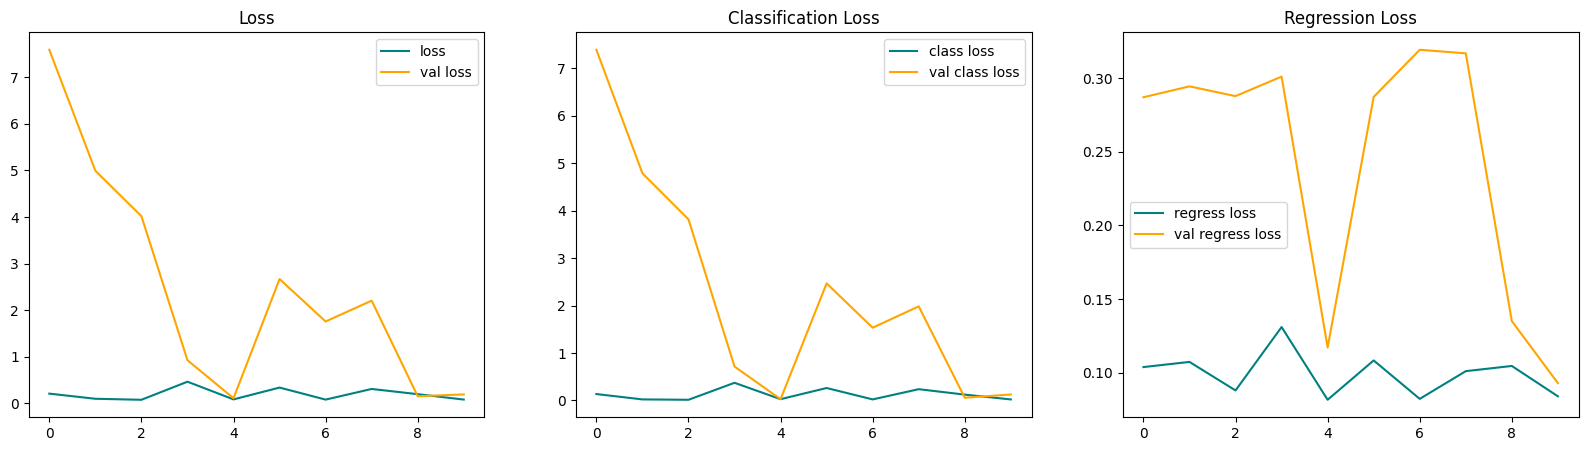

In [ ]:
#check the model performance in plot

fig, ax = plt.subplots(ncols=3, figsize=(20,5))

ax[0].plot(hist.history['total_loss'], color='teal', label='loss')
ax[0].plot(hist.history['val_total_loss'], color='orange', label='val loss')
ax[0].title.set_text('Loss')
ax[0].legend()

ax[1].plot(hist.history['class_loss'], color='teal', label='class loss')
ax[1].plot(hist.history['val_class_loss'], color='orange', label='val class loss')
ax[1].title.set_text('Classification Loss')
ax[1].legend()

ax[2].plot(hist.history['regress_loss'], color='teal', label='regress loss')
ax[2].plot(hist.history['val_regress_loss'], color='orange', label='val regress loss')
ax[2].title.set_text('Regression Loss')
ax[2].legend()

plt.show()

# 11. Make Predictions

### 11.1 Make Predictions on Test Set

In [287]:
model = FaceTracker(Facetracker)

In [288]:
test_data = test.as_numpy_iterator()

In [289]:
test_sample = test_data.next()

In [290]:
yhat = Facetracker.predict(test_sample[0])
# yhat = model.predict(tf.expand_dims(test_sample[0], axis=0))

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 578ms/step


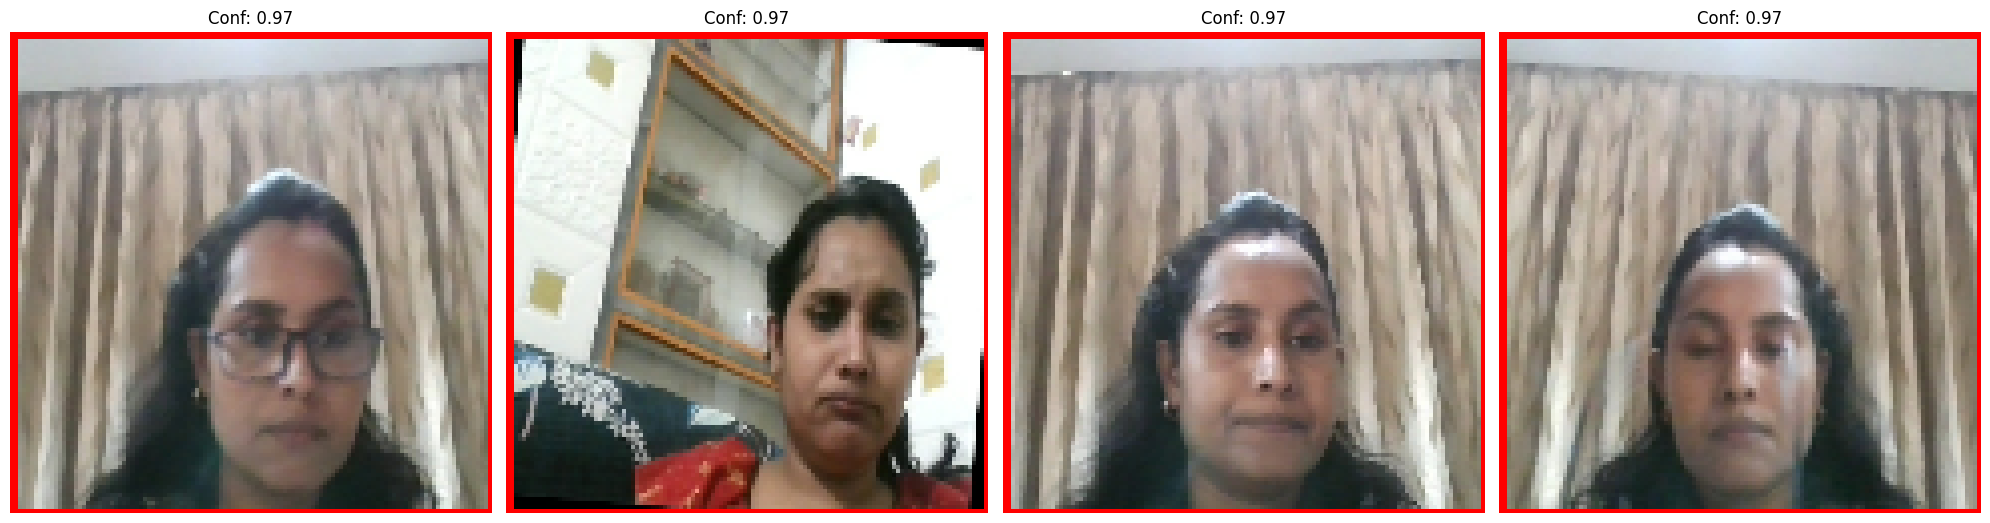

In [291]:
fig, ax = plt.subplots(ncols=4, figsize=(20, 20))

for idx in range(4): 
    sample_image = test_sample[0][idx].copy()

    if sample_image.dtype != np.uint8:
        sample_image = np.clip(sample_image, 0, 255).astype(np.uint8)

    sample_coords = yhat[1][idx]
    confidence = yhat[0][idx]

    if confidence > 0.9:
        h, w = sample_image.shape[:2]  
        pt1 = tuple(np.multiply(sample_coords[:2], [w, h]).astype(int))
        pt2 = tuple(np.multiply(sample_coords[2:], [w, h]).astype(int))
        cv2.rectangle(sample_image, pt1, pt2, (255, 0, 0), 2)

    ax[idx].imshow(sample_image)
    ax[idx].set_title(f"Conf: {confidence.item():.2f}")
    ax[idx].axis('off')

plt.tight_layout()
plt.show()


### 11.2 Save the Model

In [292]:
from tensorflow.keras.models import load_model

In [293]:
Facetracker.save('Facerecognition.h5')
# Facetracker.save('FaceIQ.keras')
# FaceTracker = load_model('FaceTracker.keras', custom_objects={'FaceTracker': FaceTracker}, compile=False)
# Facetracker.save('FaceIQ.h5')
# facetracker.save('facetracker.h5')




In [294]:
# Facetracker = load_model('FaceIQ.h5')
FaceTracker = load_model('Facerecognition.h5', compile=False)
# FaceTracker = load_model('FaceIQ.h5', custom_objects={'FaceTracker': FaceTracker}, compile=False)


In [295]:
### 12 Accuracy Checking

In [296]:
# Accuracy (training and validation)
train_acc = hist.history['accuracy'][-1] * 100
val_acc = hist.history['val_accuracy'][-1] * 100

print(f"Final Training Accuracy: {train_acc:.2f}%")
print(f"Final Validation Accuracy: {val_acc:.2f}%")


Final Training Accuracy: 98.04%
Final Validation Accuracy: 76.54%
